#**Coding of Data preparation **

In [ ]:
!pip install patchify


In [ ]:
import os
import cv2
from PIL import Image
import numpy as np
from patchify import patchify
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import random
from tensorflow.keras.utils import to_categorical


In [ ]:
minmaxscaler = MinMaxScaler()

In [ ]:
!ls -lah '/content/drive/MyDrive/Colab Notebooks/datasets/Satellite/DubaiDataset'

total 33K
-rw------- 1 root root  548 May 29  2020  classes.json
drwx------ 2 root root 4.0K Aug  6 11:30 'Tile 1'
drwx------ 2 root root 4.0K Aug  6 11:30 'Tile 2'
drwx------ 2 root root 4.0K Aug  6 11:30 'Tile 3'
drwx------ 2 root root 4.0K Aug  6 11:30 'Tile 4'
drwx------ 2 root root 4.0K Aug  6 11:30 'Tile 5'
drwx------ 2 root root 4.0K Aug  6 11:30 'Tile 6'
drwx------ 2 root root 4.0K Aug  6 11:30 'Tile 7'
drwx------ 2 root root 4.0K Aug  6 11:30 'Tile 8'


In [ ]:
dataset_root_folder = '/content/drive/MyDrive/Colab Notebooks/datasets/Satellite'

In [ ]:
dataset_name = 'DubaiDataset'

In [ ]:
for path,subdirs,files in os.walk(os.path.join(dataset_root_folder,dataset_name)):
  dir_name = path.split(os.path.sep)[-1]
 #print(dir_name)
  if dir_name == 'masks': #images
   images=os.listdir(path)
   print(path)
   #print(images)
   for i,image_name in enumerate(images):
    if image_name.endswith('.png'): #jpg
     #print(image_name)
     a=True

/content/drive/MyDrive/Colab Notebooks/datasets/Satellite/DubaiDataset/Tile 2/masks
/content/drive/MyDrive/Colab Notebooks/datasets/Satellite/DubaiDataset/Tile 8/masks
/content/drive/MyDrive/Colab Notebooks/datasets/Satellite/DubaiDataset/Tile 3/masks
/content/drive/MyDrive/Colab Notebooks/datasets/Satellite/DubaiDataset/Tile 4/masks
/content/drive/MyDrive/Colab Notebooks/datasets/Satellite/DubaiDataset/Tile 1/masks
/content/drive/MyDrive/Colab Notebooks/datasets/Satellite/DubaiDataset/Tile 6/masks
/content/drive/MyDrive/Colab Notebooks/datasets/Satellite/DubaiDataset/Tile 5/masks
/content/drive/MyDrive/Colab Notebooks/datasets/Satellite/DubaiDataset/Tile 7/masks


In [ ]:
image_patch_size=256

In [ ]:
image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile 2/images/image_part_001.jpg',1)

In [ ]:
image.shape

(544, 509, 3)

In [ ]:
image_patches=patchify(image,(image_patch_size,image_patch_size,3),step=image_patch_size)

تستخدم لإنشاء "قطع" أو "شرائح" من الصورة الأصلية باستخدام patchifyمكتبة  patchify



In [ ]:
len(image_patches)

2

In [ ]:
print (image_patches.shape)

(2, 1, 1, 256, 256, 3)


In [ ]:
image_x=image_patches[0,0,:,:]
#MinMaxScalar
image_y=minmaxscaler.fit_transform(image_x.reshape(-1,image_x.shape[-1])).reshape(image_x.shape)

In [ ]:
image_y[0].shape

(256, 256, 3)

In [ ]:
print(type(image))

<class 'numpy.ndarray'>


In [ ]:
type(Image.fromarray(image))

PIL.Image.Image

In [ ]:
image.shape

(544, 509, 3)

In [ ]:
(image.shape[1]//image_patch_size)*image_patch_size

256

In [ ]:
image_dataset=[]
mask_dataset=[]
for image_type in ['images','masks']:
  if image_type=='images':
   image_extestion='jpg'
  elif image_type=='masks':
   image_extestion='png'
  for tile_id in range(1,8):
    for image_id in range (1,20):
      image =cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile {tile_id}/{image_type}/image_part_00{image_id}.{image_extestion}',1)
      if image is not None:
        if image_type=='masks':
         image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        #print(image.shape)
        size_x=(image.shape[1]//image_patch_size)*image_patch_size
        size_y=(image.shape[0]//image_patch_size)*image_patch_size
        #print('{}---- {} -- {}'.format(image.shape,size_x,size_y))
        image=Image.fromarray(image)
        image=image.crop((0,0,size_x,size_y))
        #print('{} , {}'.format(image.size[0],image.size[1]))
        image=np.array(image)
        patched_images=patchify(image,(image_patch_size,image_patch_size,3),step=image_patch_size)
        #print(len(patched_images))
        for i in range(patched_images.shape[0]):
          for j in range(patched_images.shape[1]):
            if image_type=='images':
              individual_patched_image = patched_images[i,j,:,:]
              #print(individual_patched_image.shape)
              individual_patched_image = minmaxscaler.fit_transform(individual_patched_image.reshape(-1, individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)
              individual_patched_image =individual_patched_image [0]
              #print(individual_patched_image )
              image_dataset.append(individual_patched_image)
            elif image_type=='masks':
              individual_patched_mask = patched_images[i,j,:,:]
              individual_patched_mask=individual_patched_mask[0]
              mask_dataset.append(individual_patched_mask)

In [ ]:
print(len(image_dataset))
print(len(mask_dataset))

945
945


In [ ]:
mask_dataset=np.array(mask_dataset)
image_dataset=np.array(image_dataset)

In [ ]:
type(image_dataset[0])

numpy.ndarray

In [ ]:
type(np.reshape(image_dataset[0],image_patch_size*image_patch_size*3))

numpy.ndarray

In [ ]:
print(len(image_dataset))
print(len(mask_dataset))

945
945


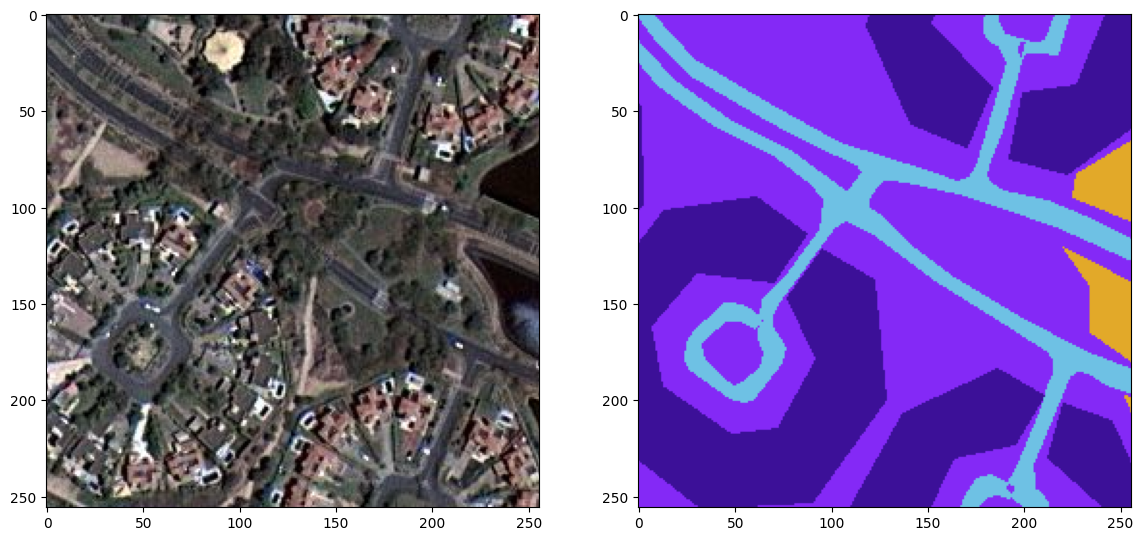

In [ ]:

random_image_id=random.randint(0,len(image_dataset))
plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
plt.imshow(mask_dataset[random_image_id])

In [ ]:
class_building='#3C1098'
class_building=class_building.lstrip('#')
#3C1098
class_building=np.array(tuple(int(class_building[i:i+2],16) for i in (0,2,4)))
print(class_building)

class_land='#8429F6'
class_land=class_land.lstrip('#')
#8429F6
class_land=np.array(tuple(int(class_land[i:i+2],16) for i in (0,2,4)))
print(class_land)

class_road='#6EC1E4'
class_road=class_road.lstrip('#')
#6EC1E4
class_road=np.array(tuple(int(class_road[i:i+2],16) for i in (0,2,4)))
print(class_road)


class_Vegetation='#FEDD3A'
class_Vegetation=class_Vegetation.lstrip('#')
#FEDD3A
class_Vegetation=np.array(tuple(int(class_Vegetation[i:i+2],16) for i in (0,2,4)))
print(class_Vegetation)

class_Water='#E2A929'
class_Water=class_Water.lstrip('#')
#E2A929
class_Water=np.array(tuple(int(class_Water[i:i+2],16) for i in (0,2,4)))
print(class_Water)


class_Unlabeled='#9B9B9B'
class_Unlabeled=class_Unlabeled.lstrip('#')
#9B9B9B
class_Unlabeled=np.array(tuple(int(class_Unlabeled[i:i+2],16) for i in (0,2,4)))
print(class_Unlabeled)



[ 60  16 152]
[132  41 246]
[110 193 228]
[254 221  58]
[226 169  41]
[155 155 155]


In [ ]:
mask_dataset.shape[0]

945

In [ ]:
label=individual_patched_mask

In [ ]:
def rgb_to_label(label):
  label_segment=np.zeros(label.shape,dtype=np.uint8)
  label_segment[np.all(label==class_Water,axis=-1)]=0
  label_segment[np.all(label==class_land,axis=-1)]=1
  label_segment[np.all(label==class_road,axis=-1)]=2
  label_segment[np.all(label==class_building,axis=-1)]=3
  label_segment[np.all(label==class_Vegetation,axis=-1)]=4
  label_segment[np.all(label==class_Unlabeled,axis=-1)]=5
  #print(label_segment)
  label_segment=label_segment[:,:,0]
  #print(label_segment)
  return label_segment

In [ ]:
labels=[]
for i in range (mask_dataset.shape[0]):
  label=rgb_to_label(mask_dataset[i])
  labels.append(label)

In [ ]:
print(len(labels))

945


array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)
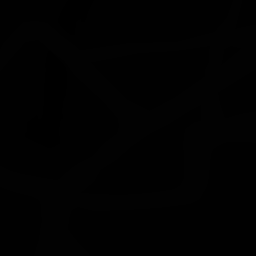

In [ ]:
labels[3]

In [ ]:
labels=np.expand_dims(labels,axis=3)

In [ ]:
labels[0]

array([[[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       ...,

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]]], dtype=uint8)

In [ ]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5], dtype=uint8)

In [ ]:
print('The label unique value is: ',format(np.unique(labels)))

The label unique value is:  [0 1 2 3 4 5]


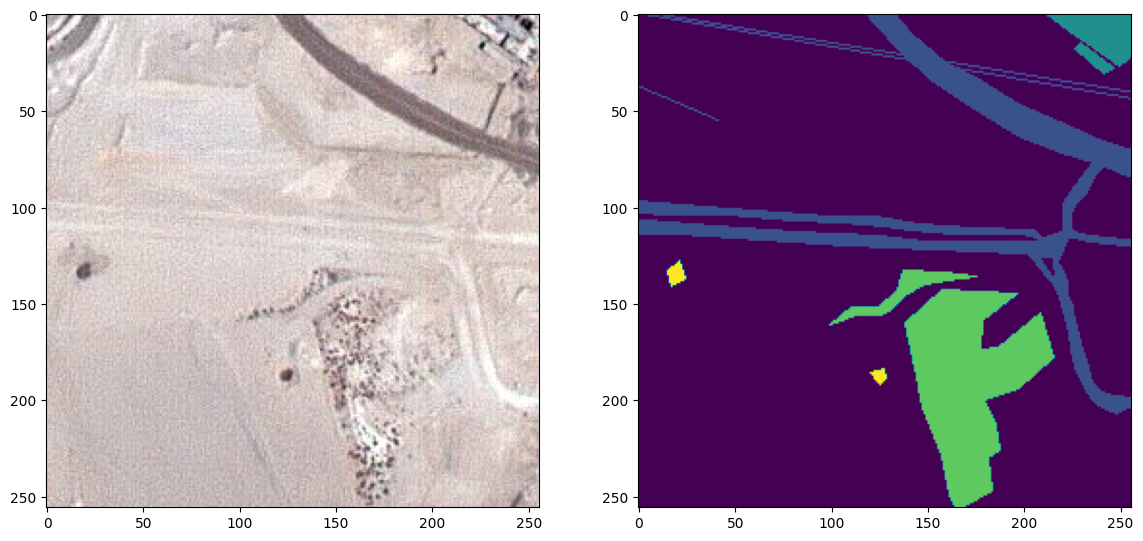

In [ ]:

random_image_id = random.randint(0, len(image_dataset))
plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
#plt.imshow(mask_dataset[random_image_id])
plt.imshow(labels[random_image_id][:,:,0])

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)
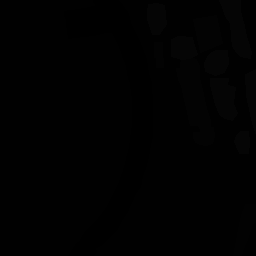

In [ ]:
labels[0][:,:,0]

In [ ]:
total_classes=len(np.unique(labels))

In [ ]:
total_classes

6

In [ ]:
labels_categorical_dataset = to_categorical(labels, num_classes=total_classes)

In [ ]:
labels_categorical_dataset.shape

(945, 256, 256, 6)

In [ ]:
master_trianing_dataset = image_dataset


In [ ]:
master_trianing_dataset.shape

(945, 256, 256, 3)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(master_trianing_dataset ,labels_categorical_dataset, test_size=0.15, random_state=100)



In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(803, 256, 256, 3)
(142, 256, 256, 3)
(803, 256, 256, 6)
(142, 256, 256, 6)


In [ ]:
image_height = x_train.shape[1]
image_width = x_train.shape[2]
image_channels = x_train.shape[3]
total_classes = y_train.shape[3]

In [ ]:
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)


256
256
3
6


#Coding of Deep learning Model

In [ ]:
!pip install -U segmentation-models

In [ ]:
import segmentation_models as sm

In [ ]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from keras.layers import concatenate, BatchNormalization, Dropout, Lambda

In [ ]:
from keras import backend as K

In [ ]:
def Jaccard_coef(y_true,y_pred):
  y_true_flatten=K.flatten(y_true)
  y_pred_flatten=K.flatten(y_pred)
  intersection=K.sum(y_true_flatten*y_pred_flatten)
  final_coef_value=(intersection + 1.0 )/ (K.sum (y_true_flatten) + K.sum (y_pred_flatten) - intersection + 1.0)
  return final_coef_value

In [ ]:
def multi_unet_model(n_classes=5,image_height=256,image_width=256,image_channels=1):
  inputs=Input((image_height,image_width,image_channels))
  source_input = inputs
  c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(source_input)
  c1 = Dropout(0.2)(c1)
  c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c1)
  p1 = MaxPooling2D((2,2))(c1)

  c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p1)
  c2 = Dropout(0.2)(c2)
  c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c2)
  p2 = MaxPooling2D((2,2))(c2)

  c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p2)
  c3 = Dropout(0.2)(c3)
  c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c3)
  p3 = MaxPooling2D((2,2))(c3)

  c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p3)
  c4 = Dropout(0.2)(c4)
  c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c4)
  p4 = MaxPooling2D((2,2))(c4)


  c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p4)
  c5 = Dropout(0.2)(c5)
  c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c5)


  u6 = Conv2DTranspose(128, (2,2), strides=(2,2), padding="same")(c5)
  u6 = concatenate([u6, c4])
  c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u6)
  c6 = Dropout(0.2)(c6)
  c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c6)

  u7 = Conv2DTranspose(64, (2,2), strides=(2,2), padding="same")(c6)
  u7 = concatenate([u7, c3])
  c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u7)
  c7 = Dropout(0.2)(c7)
  c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c7)

  u8 = Conv2DTranspose(32, (2,2), strides=(2,2), padding="same")(c7)
  u8 = concatenate([u8, c2])
  c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u8)
  c8 = Dropout(0.2)(c8)
  c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c8)

  u9 = Conv2DTranspose(16, (2,2), strides=(2,2), padding="same")(c8)
  u9 = concatenate([u9, c1], axis=3)
  c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u9)
  c9 = Dropout(0.2)(c9)
  c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c9)

  outputs = Conv2D(n_classes, (1,1), activation="softmax")(c9)
  model = Model(inputs=[inputs], outputs=[outputs])
  return model


In [ ]:
metrics = ["accuracy", Jaccard_coef]


In [ ]:
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)


256
256
3
6


In [ ]:
def get_deep_learning_model():
  return multi_unet_model(n_classes=total_classes,
                          image_height=image_height,
                          image_width=image_width,
                          image_channels=image_channels)

In [ ]:
model = get_deep_learning_model()

#create Loss Funcation

*   dice loss > Focal Loss > Total Loss

*   Total Loss = (Dice loss + (1*Focal Loss))



In [ ]:
weights = [0.1666, 0.1666, 0.1666, 0.1666, 0.1666, 0.1666]